In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
archivo = "HortonGeneralHospital_2.csv"
df = pd.read_csv(archivo)

In [3]:
datos_ratio_conBen = df.ratio
datos_ratio_hasta_noviembre2003 = df.ratio[:49]
datos_ratio_desde_marzo2004 = df.ratio[52:]
datos_ratio_sinBen = pd.concat([datos_ratio_hasta_noviembre2003, datos_ratio_desde_marzo2004])

### 1. Métodos gráficos

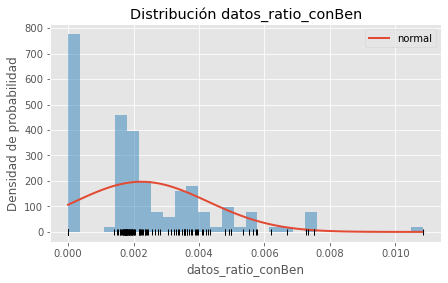

In [6]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(datos_ratio_conBen)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(datos_ratio_conBen), max(datos_ratio_conBen), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=datos_ratio_conBen, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(datos_ratio_conBen, np.full_like(datos_ratio_conBen, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución datos_ratio_conBen')
ax.set_xlabel('datos_ratio_conBen')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

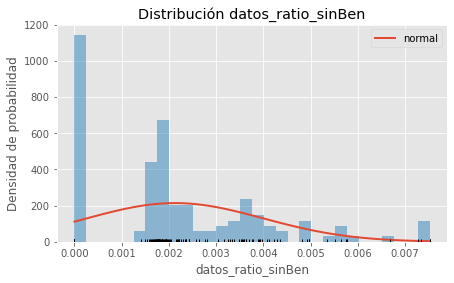

In [12]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(datos_ratio_sinBen)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(datos_ratio_sinBen), max(datos_ratio_sinBen), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=datos_ratio_sinBen, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(datos_ratio_sinBen, np.full_like(datos_ratio_sinBen, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución datos_ratio_sinBen')
ax.set_xlabel('datos_ratio_sinBen')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

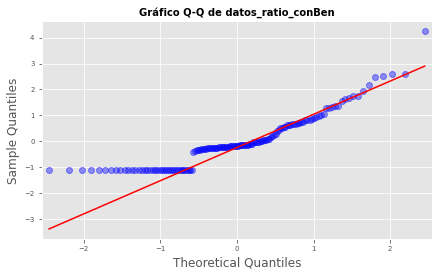

In [8]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    datos_ratio_conBen,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de datos_ratio_conBen', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

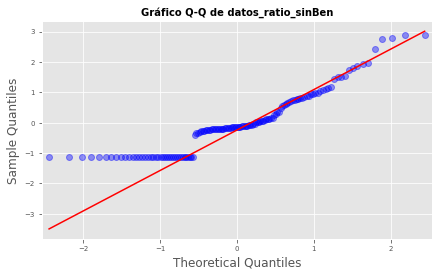

In [17]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    datos_ratio_sinBen,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de datos_ratio_sinBen', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

### 2. Métodos analíticos asimetría y curtosis
Los estadísticos de asimetría (Skewness) y curtosis pueden emplearse para detectar desviaciones de la normalidad. Un valor de curtosis y/o coeficiente de asimetría entre -1 y 1, es generalmente considerada una ligera desviación de la normalidad. Entre -2 y 2 hay una evidente desviación de la normal pero no extrema.

In [9]:
print('Kursotis:', stats.kurtosis(datos_ratio_conBen))
print('Skewness:', stats.skew(datos_ratio_conBen))

Kursotis: 1.7036019339339
Skewness: 1.1006101564059843


In [14]:
print('Kursotis:', stats.kurtosis(datos_ratio_sinBen))
print('Skewness:', stats.skew(datos_ratio_sinBen))

Kursotis: 0.3649609805780605
Skewness: 0.8103229690459524


### 3. Contraste de hipótesis
Los test Shapiro-Wilk test y D'Agostino's K-squared test son dos de los test de hipótesis más empleados para analizar la normalidad. En ambos, se considera como hipótesis nula que los datos proceden de una distribución normal.

El p-value de estos test indica la probabilidad de obtener unos datos como los observados si realmente procediesen de una población con una distribución normal con la misma media y desviación que estos. Por lo tanto, si el p-value es menor que un determinado valor (típicamente 0.05), entonces se considera que hay evidencias suficientes para rechazar la normalidad.

El test de Shapiro-Wilk se desaconseja cuando se dispone de muchos datos (más de 50) por su elevada sensibilidad a pequeñas desviaciones de la normal.

In [10]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(datos_ratio_conBen)
shapiro_test

ShapiroResult(statistic=0.8843843340873718, pvalue=5.26779375675801e-09)

In [15]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(datos_ratio_sinBen)
shapiro_test

ShapiroResult(statistic=0.894536554813385, pvalue=2.3010009897461714e-08)

In [11]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(datos_ratio_conBen)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 29.957171197666824, p-value = 3.12523678689713e-07


In [16]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(datos_ratio_sinBen)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 14.315468673297305, p-value = 0.0007788170931479071
